# Heart Attack Risk Prediction

>Project build by "Abdul Samad"

>Id: 0000335385
 
>From Allama Iqbal Open University, Islamabad.

Let's build a heart attack risk prediction model using a dataset. We'll take the following steps:

## 1.  Load and Explore the Data: 
Inspect the data and identify features and target variables.

In [2]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import the datasets
data = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')
pd.set_option('display.max_columns',None)
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


>### Find the Missing Values

In [4]:
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

So we have nothing any missing values in our dataset.

> ### Check the duplicates:

In [5]:
print(data.duplicated().sum())

0


In this dataset, there are no presence of any duplicated value.

In [6]:
print('The Shape of our dataset is: ',data.shape)
data.dtypes

The Shape of our dataset is:  (8763, 26)


Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

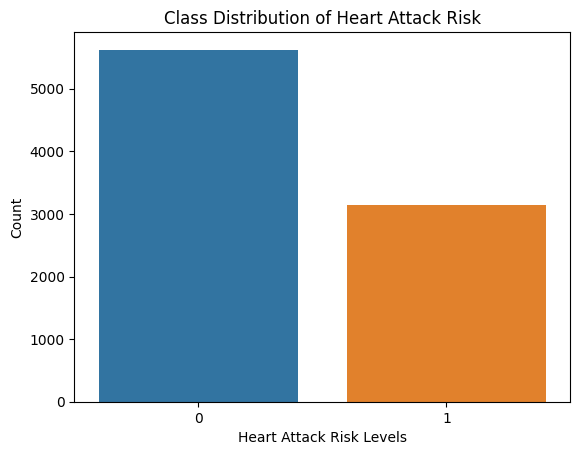

In [7]:
# Visualize the class distribution
sns.countplot(x='Heart Attack Risk', data=data)
plt.title('Class Distribution of Heart Attack Risk')
plt.xlabel('Heart Attack Risk Levels')
plt.ylabel('Count')
plt.show()

## 2. Preprocess the Data: 
Handle missing values, encode categorical variables, and scale features if necessary.

#### Including the only relevant Columns...

In [9]:

data=data[['Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI', 'Triglycerides','Heart Attack Risk'
       ]]


In [10]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,0,0,9,31.251233,286,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,1,0,1,27.194973,235,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,1,1,9,28.176571,587,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,1,0,9,36.464704,378,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,1,0,6,21.809144,231,0


In [11]:
# Separate blood pressure into 'Systolic' and 'Diastolic' values
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data = data.drop(columns=['Blood Pressure'])

# Encode categorical variables
label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Define features and target
X = data.drop(columns=['Heart Attack Risk'])
y = data['Heart Attack Risk']

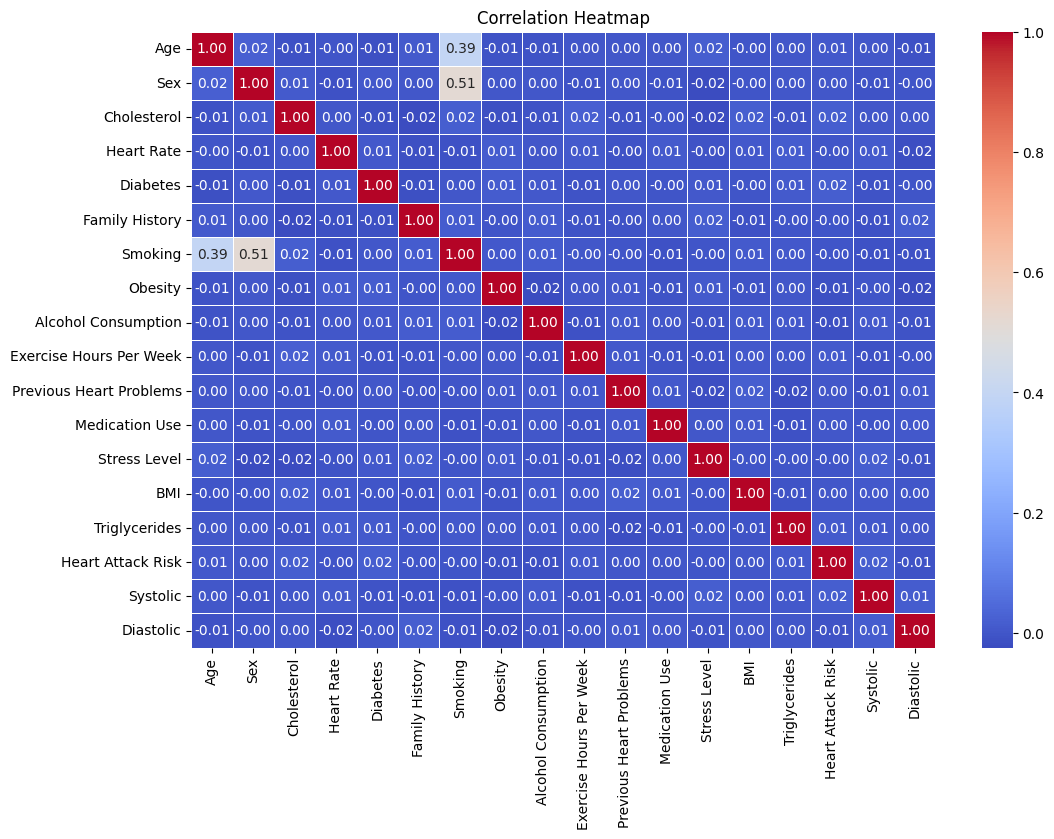

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Train a Model: 
Use a suitable machine learning model, such as GaussianNB.

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

> #### Choosing the Best Model for Training

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),MLPClassifier()]
model_names=["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","Gaussian Naive Bayes","K-Nearest Neighbors","Multi Layer Perceptron"]
models_scores=[]
for model,model_name in zip(models,model_names):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    models_scores.append([model_name,accuracy])
sorted_models_scores=sorted(models_scores,key=lambda x:x[1],reverse=True)
for model in sorted_models_scores:
    print("Accuracy Score: ",f'{model[0]}: {model[1]*100:.2f}')

Accuracy Score:  Logistic Regression: 64.32
Accuracy Score:  Support Vector Machine: 64.32
Accuracy Score:  Gaussian Naive Bayes: 64.32
Accuracy Score:  Multi Layer Perceptron: 63.86
Accuracy Score:  Random Forest: 63.22
Accuracy Score:  K-Nearest Neighbors: 59.49
Accuracy Score:  Decision Tree: 54.32


In [17]:
# Train a LogisticRegression

model=GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## 4. Evaluate the Model: 
Measure accuracy using metrics like accuracy score, confusion matrix, etc.

In [18]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy of the model is: ",round(accuracy*100,2))


Accuracy of the model is:  64.32


In [19]:
scores=cross_val_score(model,X,y,cv=20)
print("Cross-Validation Accuracy: ",scores.mean()*100)


Cross-Validation Accuracy:  64.1789143029509


Text(0.5, 1.0, 'Accuracy of Gaussian Naive Bayes')

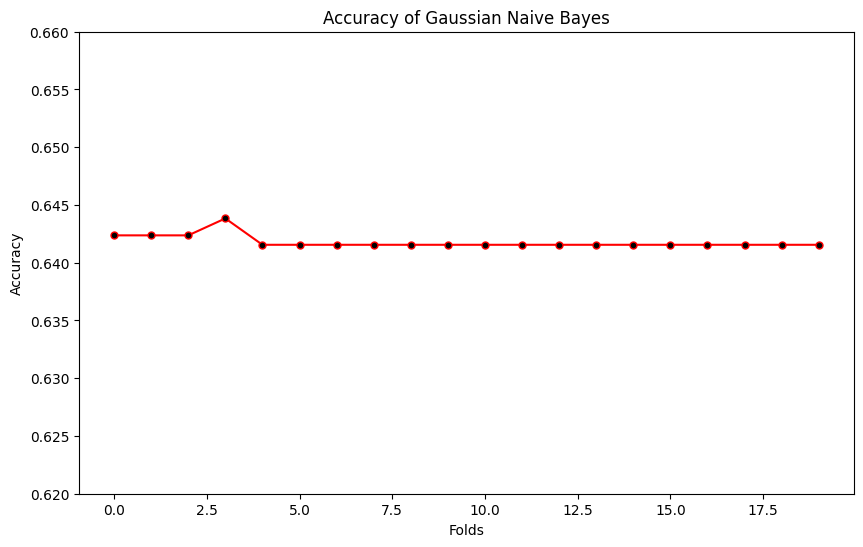

In [20]:
plt.figure(figsize=(10,6))
plt.plot(scores,marker='o',markersize=5,markerfacecolor='black',color='red')
plt.ylim([0.62,0.66])
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.title("Accuracy of Gaussian Naive Bayes")